In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

============================================================
HIGH-DIMENSIONAL RIDGE REGRESSION
A Complete Linear Algebra–Based Experimental Study
============================================================

In [3]:
np.set_printoptions(precision=4, suppress=True)

In [4]:
print("\n📐 High-Dimensional Ridge Regression")
print("A Complete Linear Algebra–Based Experimental Study")
print("Regime: d >> n\n")


📐 High-Dimensional Ridge Regression
A Complete Linear Algebra–Based Experimental Study
Regime: d >> n



============================================================
1. DATA GENERATION
============================================================

In [5]:
print("1) Dataset Generation")

1) Dataset Generation


In [6]:
np.random.seed(42)

In [7]:
n = 60
d = 500
s = 8
sigma = 0.1

In [8]:
X = np.random.randn(n, d)

In [9]:
beta_true = np.zeros(d)
beta_true[:s] = np.random.randn(s)

In [10]:
y = X @ beta_true + sigma * np.random.randn(n)

In [11]:
print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")
print(f"True sparsity (nonzeros in β*) = {s}\n")

X shape = (60, 500)
y shape = (60,)
True sparsity (nonzeros in β*) = 8



============================================================
2. DATASET VISUALISATION (PCA)
============================================================

In [12]:
print("2) Dataset Visualisation via PCA")

2) Dataset Visualisation via PCA


In [13]:
X_centered = X - X.mean(axis=0)
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

In [ ]:
X_pca = U[:, :2] @ np.diag(S[:2]) 

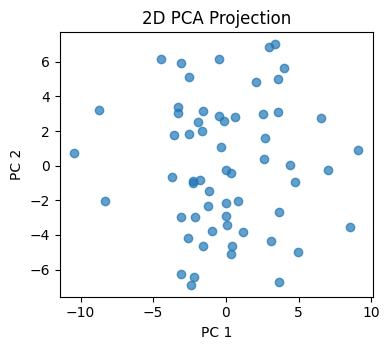

In [15]:
plt.figure(figsize=(4, 3.6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("2D PCA Projection")
plt.tight_layout()
plt.show()

In [16]:
explained_var = (S**2) / np.sum(S**2)
cum_var = np.cumsum(explained_var)

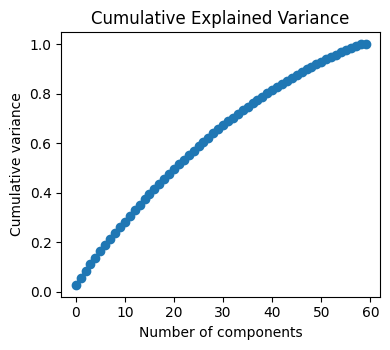

In [17]:
plt.figure(figsize=(4, 3.6))
plt.plot(cum_var, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance")
plt.title("Cumulative Explained Variance")
plt.tight_layout()
plt.show()

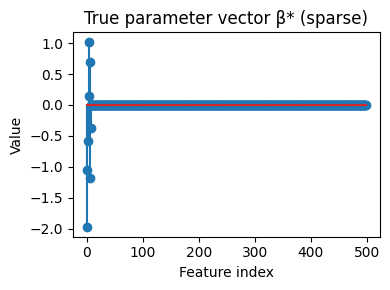

In [18]:
plt.figure(figsize=(4, 3.0))
plt.stem(beta_true)
plt.xlabel("Feature index")
plt.ylabel("Value")
plt.title("True parameter vector β* (sparse)")
plt.tight_layout()
plt.show()

============================================================
3. RANK DEFICIENCY
============================================================

In [19]:
print("3) Rank Deficiency and Ill-Posedness")

3) Rank Deficiency and Ill-Posedness


In [20]:
rank_X = np.linalg.matrix_rank(X)
null_dim = d - rank_X

In [21]:
print(f"rank(X) = {rank_X}")
print(f"ambient dimension d = {d}")
print(f"null space dimension = {null_dim}")
print("→ Unregularised least squares has infinitely many solutions\n")

rank(X) = 60
ambient dimension d = 500
null space dimension = 440
→ Unregularised least squares has infinitely many solutions



============================================================
4. LOSS GEOMETRY
============================================================

In [22]:
print("4) Loss Geometry via XᵀX")

4) Loss Geometry via XᵀX


In [23]:
XtX = X.T @ X
eigvals = np.linalg.eigvalsh(XtX)

In [24]:
print(f"Smallest eigenvalue of XᵀX = {eigvals.min():.2e}")
print(f"Number of near-zero eigenvalues = {np.sum(eigvals < 1e-10)}\n")

Smallest eigenvalue of XᵀX = -4.86e-13
Number of near-zero eigenvalues = 440



============================================================
5. RIDGE REGRESSION FROM SCRATCH
============================================================

In [25]:
print("5) Ridge Regression from Scratch")

5) Ridge Regression from Scratch


In [26]:
def ridge_regression(X, y, lam):
    return np.linalg.solve(
        X.T @ X + lam * np.eye(X.shape[1]),
        X.T @ y
    )

In [27]:
lam = 1.0
print(f"Using regularisation λ = {lam}")

Using regularisation λ = 1.0


In [28]:
beta_ridge = ridge_regression(X, y, lam)

============================================================
6. WELL-POSEDNESS
============================================================

In [29]:
print("\n6) Ridge Restores Well-Posedness")


6) Ridge Restores Well-Posedness


In [30]:
min_eig_ridge = (eigvals + lam).min()
print(f"min eigenvalue of (XᵀX + λI) = {min_eig_ridge:.3f}")
print("→ Spectrum lifted away from zero\n")

min eigenvalue of (XᵀX + λI) = 1.000
→ Spectrum lifted away from zero



============================================================
7. RIDGE SOLUTION & ERROR
============================================================

In [31]:
print("7) Ridge Solution and Estimation Error")

7) Ridge Solution and Estimation Error


In [32]:
norm_beta = np.linalg.norm(beta_ridge)
err = np.linalg.norm(beta_ridge - beta_true)

In [33]:
print(f"||β̂_ridge||₂ = {norm_beta:.3f}")
print(f"||β̂_ridge − β*||₂ = {err:.3f}\n")

||β̂_ridge||₂ = 1.083
||β̂_ridge − β*||₂ = 2.698



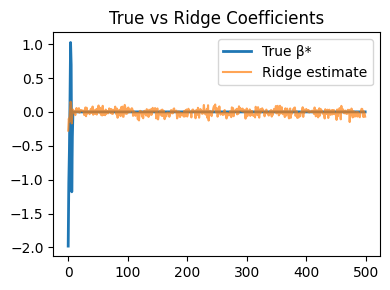

In [34]:
plt.figure(figsize=(4, 3.0))
plt.plot(beta_true, label="True β*", linewidth=2)
plt.plot(beta_ridge, label="Ridge estimate", alpha=0.7)
plt.legend()
plt.title("True vs Ridge Coefficients")
plt.tight_layout()
plt.show()

============================================================
8. EFFECTIVE DIMENSION
============================================================

In [35]:
print("8) Effective Dimension")

8) Effective Dimension


In [36]:
def effective_dimension(eigvals, lam):
    return np.sum(eigvals / (eigvals + lam))

In [37]:
lam_vals = [0.01, 0.1, 1, 10, 100]
d_eff = [effective_dimension(eigvals, l) for l in lam_vals]

In [38]:
df_eff = pd.DataFrame({
    "lambda": lam_vals,
    "effective_dimension": d_eff
})

In [39]:
print(df_eff, "\n")

   lambda  effective_dimension
0    0.01            59.998626
1    0.10            59.986259
2    1.00            59.862914
3   10.00            58.660555
4  100.00            49.052022 



============================================================
9. OLS COMPARISON
============================================================

In [40]:
print("9) Comparison with Ordinary Least Squares")

9) Comparison with Ordinary Least Squares


In [41]:
try:
    beta_ols = np.linalg.solve(X.T @ X, X.T @ y)
    ols_err = np.linalg.norm(beta_ols - beta_true)
    print(f"||β̂_OLS − β*||₂ = {ols_err:.2f}")
except np.linalg.LinAlgError:
    print("OLS failed: XᵀX is singular (expected when d >> n)")

||β̂_OLS − β*||₂ = 83.75
